In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
#opening json file
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [3]:
df_b

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


In [4]:
#we want to study only restaurants and bars so we drop all the other activities
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_activities=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

It could be interesting to study how the average ratings changes in different cities. First of all, for a meaningful analysis we will remove the closed restaurants.

In [5]:
df_activities = df_activities[df_activities.is_open==1]

In [6]:
df_activities

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,97035,45.399154,-122.737600,4.0,137,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ..."
160563,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta,59 Williams St,Chelsea,MA,02150,42.389221,-71.040882,5.0,733,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
160572,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,1,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'..."
160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"{'BusinessParking': '{'garage': False, 'street...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."


Now, we group by city and we look for the average of the stars.

In [7]:
df_activities.groupby(by='city').mean('stars').drop(columns=['latitude', 'longitude', 'is_open', 'review_count']).sort_values(by = 'stars', ascending=False)

,stars
city,
portland,5.0
columbus,5.0
Northeast Orlando,5.0
Winter park,5.0
Union Park,5.0
...,...
Sheridan,1.5
Englewood,1.5
E.Point,1.5


As we can see, there are a lot of cities with the average stars=5, but how many of them have just a few reviews ?

Now, we will look at how many reviews each city has in order to decide how to select a meaningful thereshold and consider only the cities such that the review count is bigger than the threshold.

In [8]:
df_rev = df_activities.groupby(by='city').count().drop(columns= ['business_id', 'name', 'address', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
                                                       'is_open', 'attributes', 'categories', 'hours'])

Now that we have for each city the review count we can ask ourself: what is the mean of the review count ?

In [9]:
df_rev.mean()

review_count    72.551899
dtype: float64

What are the maximum and the minimum of the review count ?

In [10]:
print('the maximum is: ', df_rev.max())

the maximum is:  review_count    2842
dtype: int64


In [11]:
print('the minimum is:', df_rev.min())

the minimum is: review_count    1
dtype: int64


What about the median ?

In [12]:
print('the median is: ', df_rev.median())

the median is:  review_count    8.0
dtype: float64


The median is a very important value. It allows us to notice that the percentage of review counts smaller or equal than 8 is 50%. This mean that the number of reviews in different cities is small in general. To have a better understanding we can plot the distribution.

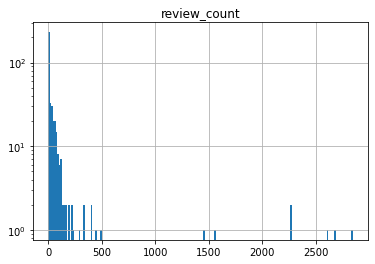

In [13]:
df_rev.hist(bins=200, log=True)
plt.show()

As we can see, the distribution is very left-skewed, it means that the majority of the cities has a very few reviews. We will then consider simply cities with more than 100 reviews to have a meaningful analysis.

In [14]:
df_rev = df_rev[df_rev['review_count']>100]

In [15]:
df_rev

,review_count
city,
Altamonte Springs,142
Atlanta,2263
Austin,2601
Beaverton,338
Boston,1464
Boulder,341
Brookline,123
Burnaby,400
Cambridge,404


In [16]:
df_rev.shape

(38, 1)

As we can see, we have removed a lot of cities. Just 38/350 cities remain there.

In [17]:
list_cities = df_rev.index.tolist()

In [18]:
list_cities

['Altamonte Springs',
 'Atlanta',
 'Austin',
 'Beaverton',
 'Boston',
 'Boulder',
 'Brookline',
 'Burnaby',
 'Cambridge',
 'Clermont',
 'Columbus',
 'Coquitlam',
 'Decatur',
 'Dublin',
 'Hilliard',
 'Kissimmee',
 'Lake Mary',
 'Lake Oswego',
 'New Westminster',
 'Newton',
 'North Vancouver',
 'Orlando',
 'Oviedo',
 'Portland',
 'Quincy',
 'Richmond',
 'Salem',
 'Sanford',
 'Smyrna',
 'Somerville',
 'Surrey',
 'Tigard',
 'Tucker',
 'Vancouver',
 'Waltham',
 'Westerville',
 'Winter Garden',
 'Winter Park']

We select from the dataframe of the restaurants, the ones whose city is in the list above.

In [19]:
df_activities = df_activities[df_activities['city'].isin(list_cities)]

We will print the ten cities with the highest number of average stars for restaurants

In [20]:
df_to_visualize = df_activities.groupby(by='city').mean('stars').sort_values('stars', ascending=False).drop(columns= ['latitude', 'longitude', 'is_open', 'review_count'])[0:10]
df_to_visualize

,stars
city,
Portland,3.890570
Winter Park,3.848624
Somerville,3.829694
Brookline,3.768293
Boulder,3.749267
Lake Oswego,3.735294
Austin,3.727028
Cambridge,3.702970
Salem,3.683333


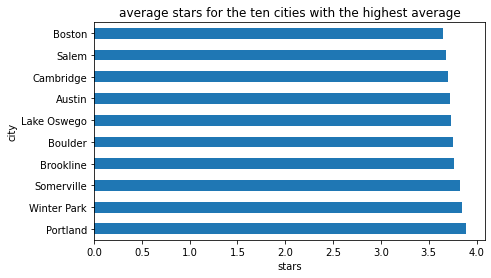

In [21]:
plt.rcParams["figure.figsize"] = (7,4)
ax = df_to_visualize.plot(kind = 'barh')
ax.get_legend().remove()
plt.title('average stars for the ten cities with the highest average')
plt.xlabel('stars')
plt.show()

As we can notice, the city with the highest average star is Portland with an average of 3.89 stars

Are all these cities close to each other or are they far from each other ?

In [23]:
df_activities

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,3.0,7,1,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160556,87f7kR7nTz8WHnmtLM_S6w,O Ya,9 East St Pl,Boston,MA,02111,42.351408,-71.056867,4.5,737,1,"{'RestaurantsPriceRange2': '4', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:30',..."
160561,jYgqSazE0gUyI7qq086Dzw,Chart House,5700 SW Terwilliger,Portland,OR,97239,45.483154,-122.682748,3.5,457,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,97035,45.399154,-122.737600,4.0,137,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ..."
160572,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,1,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'..."


In [24]:
### we define the Bounding Box to plot

BBox = (df_activities.longitude.min(),   df_activities.longitude.max(),      
         df_activities.latitude.min(), df_activities.latitude.max())
print(BBox)

(-123.2577265, -70.8685266, 28.1361019, 49.3790102203)


In [25]:
ruh_m = plt.imread('map.png')

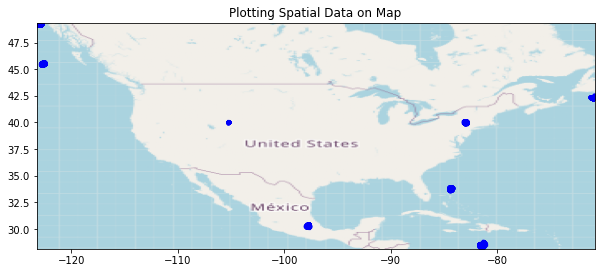

In [26]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df_activities.longitude, df_activities.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
plt.show()

As we can see we can conclude that there is not a geografical association between the most liked restaurants.

In [26]:
list_df=[]
for i in range(1, 19):
    print(i)
    df = pd.read_csv('review'+str(i)+'.csv')
    df.drop(['text','review_id','user_id','funny','cool'], axis=1)
    list_df.append(df)
reviews = pd.concat(list_df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [27]:
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
...,...,...,...,...,...,...,...,...,...
135398,PHnqMOU1pzHbnUMk3Cg2zA,6olZ0y9oW9azON61AhwxYg,yyTtwwQ4JnQMJ2rn3W0S0g,1,0,0,0,"In December, I called in (as a returning custo...",2021-01-26 04:07:14
135399,dViF8gg9745CszpekNvp2g,EPYNZQFuSKqLi-on3U9dFg,RDgwjgbu5xziFIAaNn3WCQ,1,13,1,0,This guy is a moron that will stalk and harass...,2019-05-01 21:21:43
135400,7vNXRIClt-9rFzMXlrtMXA,tr13Jb83h2itjyXVwaO5eA,rbuj2X4SXIc3MDul4dcxIA,5,39,13,34,"Yummy, great chew on the bagel\nFriendly staff...",2020-06-13 02:39:26
135401,Ho57jz6U-JjrGHpGWIGLNg,HqdmRMpNvScFxjGAB40vgQ,IRzjEZ2pX4iOpnBG7oZJ7g,2,2,0,0,This used to be my car wash of choice. They di...,2020-06-22 21:54:10


In [ ]:
reviews.to_pickle('reviews')

In [27]:
reviews = pd.read_pickle('reviews')

In [28]:
reviews = reviews.sample(10000)

It would be interesting to know if there is any correlation between a good rating of an activity and the dates (months/years/days)

In [29]:
#opening json file
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)
#we want to study only restaurants and bars so we drop all the other activities
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_activities=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

In [30]:
final_df = pd.merge(df_activities,reviews, right_on='business_id', left_on='business_id')

In [31]:
final_df.to_pickle('final_df_ratings_an')

In [32]:
final_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,QciD6FbNklaJvUbLExD4Nw,ARGO,"3790 Canada Way, Unit 108",Burnaby,BC,V5G 1G4,49.254436,-123.020050,4.0,76,...,"Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',...",rNe-2bxSAbA2L8HeDL25cA,QUSvTfEInm0_6pYrSGAuHQ,1,6,0,0,I feel bad giving this place a bad review. The...,2018-06-06 21:15:00
1,QciD6FbNklaJvUbLExD4Nw,ARGO,"3790 Canada Way, Unit 108",Burnaby,BC,V5G 1G4,49.254436,-123.020050,4.0,76,...,"Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',...",HvRaB2CfeNw4qhHzHwfk0w,sr3XC0mM68wjoQK2R51I0g,5,0,0,0,Best takeout greek! Everything is always fresh...,2020-03-02 03:27:04
2,TRToVIbaVtu1KOE8DR9gCw,Texas Roadhouse,2457 S Highway 27,Clermont,FL,34711,28.538452,-81.737625,3.5,102,...,"Steakhouses, Restaurants, Salad, Barbeque, Ame...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",vhE-QbVw4OIrfP0s4f4uTA,ZvhS3-KkgtQdAVS6PCREWw,2,2,0,0,After being seated our server was very attenti...,2017-10-30 03:22:10
3,Of6xu3pY3eHe2yhiyz2dvg,Taco Bell,3255 28th Street,Boulder,CO,80301,40.033678,-105.259103,1.5,44,...,"Restaurants, Tex-Mex, Tacos, Fast Food, Breakf...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",00NV4gJIOcnYY79myKa9fA,vAUsyTV7ahOGP5Qk03rjyw,1,0,0,0,Worst Taco Bell ever. If you are prepared to c...,2015-11-25 00:44:50
4,EGZ0fhB9k0ZlI5sHda4vFw,Andy's Frozen Custard,5381 International Dr,Orlando,FL,32819,28.463278,-81.451181,4.5,36,...,"Food, Ice Cream & Frozen Yogurt, Restaurants, ...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",EUCpVxNBKR1nvYFe_ZfZLA,SxDNF855n8hEIphyDfKBjA,5,0,0,0,"YUMMY CUSTARD OMG, but also very clean cute pl...",2018-04-27 18:25:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,GTVOlps3_pCc9urmGc02Qg,Fresh Kitchen,"851 N Alafaya Trl, Ste Q-01",Orlando,FL,32828,28.557090,-81.206914,4.5,301,...,"Gluten-Free, Specialty Food, Fruits & Veggies,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:30',...",ZkEBfQh2-_rkpM-SoAI1fA,zLbOtyLwLxIHHKC39w1s5Q,5,1,0,0,Awesome food! Love Jill! \nMy staff loved the ...,2018-03-16 02:10:12
6136,87f7kR7nTz8WHnmtLM_S6w,O Ya,9 East St Pl,Boston,MA,02111,42.351408,-71.056867,4.5,737,...,"Japanese, Sushi Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:30',...",wZ6l3ryWUMmfmt_SIXhbIw,1jJkxcntGaqtpkw2VaMHtA,5,0,0,0,"Genuinely special, the best first omakase expe...",2019-01-04 17:23:13
6137,87f7kR7nTz8WHnmtLM_S6w,O Ya,9 East St Pl,Boston,MA,02111,42.351408,-71.056867,4.5,737,...,"Japanese, Sushi Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:30',...",lVyjYmT6HRfrZ_oj3woLag,EfJmhELUtvrbgjNt_ftYyg,5,0,0,0,Insanely talented chef. Booked the counter and...,2018-06-27 13:39:04
6138,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta,59 Williams St,Chelsea,MA,02150,42.389221,-71.040882,5.0,733,...,"Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",cZ7Peas7c29f6FqCK5YAhQ,6AwQ6gmN1zmUp2M4hpuhsw,5,1,0,1,That was our second time ordering from Ciao's ...,2015-11-22 19:02:06


In [89]:
df_dates = final_df.drop(columns=['name', 'address', 'state', 'postal_code', 'latitude', 'longitude','stars_x', 'review_count', 'categories', 'hours', 'is_open',
                                 'attributes', 'user_id', 'useful', 'funny', 'cool', 'text', 'business_id', 'city', 'review_id'])

In [90]:
df_dates

,stars_y,date
0,1,2018-06-06 21:15:00
1,5,2020-03-02 03:27:04
2,2,2017-10-30 03:22:10
3,1,2015-11-25 00:44:50
4,5,2018-04-27 18:25:29
...,...,...
6135,5,2018-03-16 02:10:12
6136,5,2019-01-04 17:23:13
6137,5,2018-06-27 13:39:04
6138,5,2015-11-22 19:02:06


In [91]:
df_dates.date = df_dates['date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

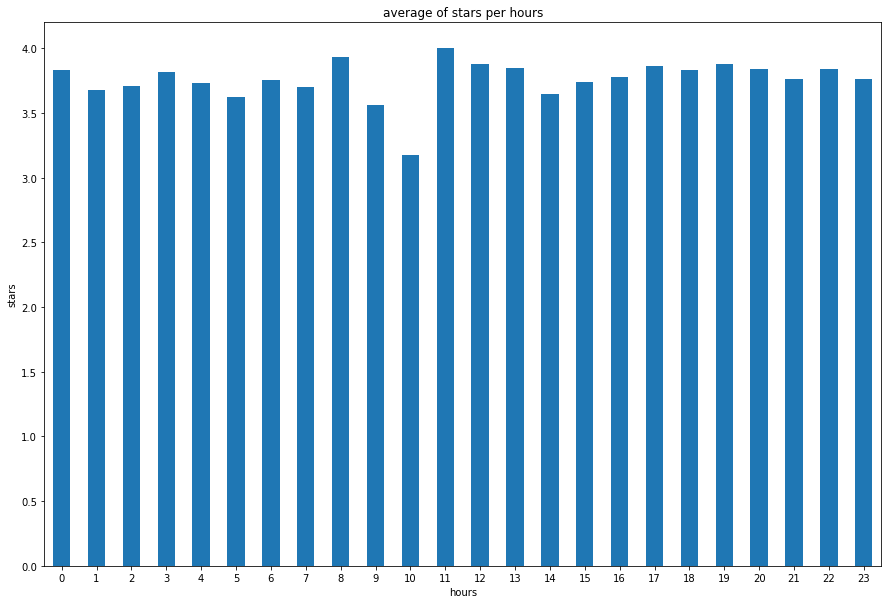

In [105]:
df_dates.groupby(df_dates['date'].dt.hour)["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(15,10))
plt.ylabel('stars')
plt.xlabel('hours')
plt.title('average of stars per hours')
plt.show()

As we can see, the 

In [106]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].mean()

date
2005    4.000000
2006    3.857143
2007    3.745455
2008    3.774194
2009    3.736486
2010    3.751174
2011    3.733945
2012    3.671429
2013    3.717391
2014    3.722433
2015    3.782407
2016    3.801712
2017    3.879840
2018    3.710526
2019    3.867503
2020    3.800505
2021    3.958333
Name: stars_y, dtype: float64

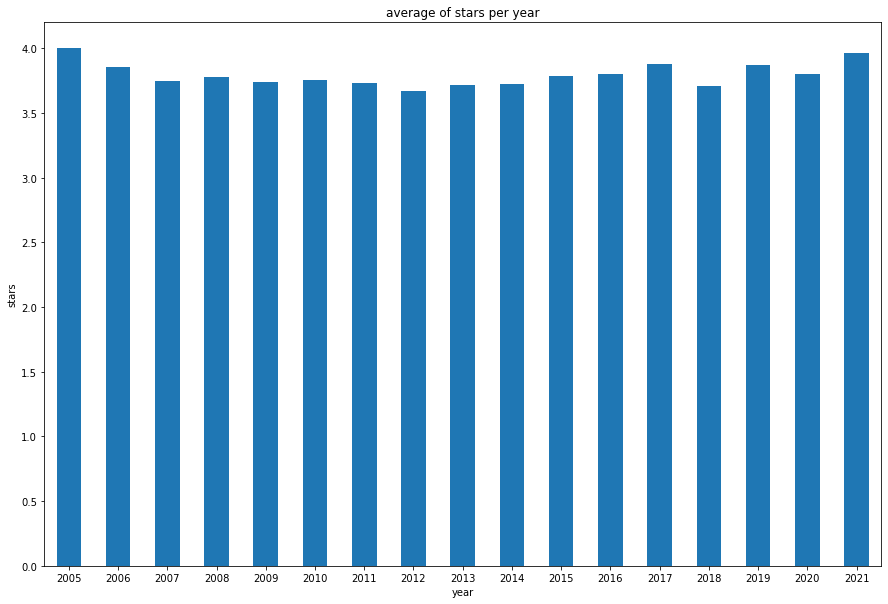

In [108]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(15,10))
plt.ylabel('stars')
plt.xlabel('year')
plt.title('average of stars per year')
plt.show()

As we can see the year in which the reviews were more positive was 2005, is this result significant ? We add confidence intervals

In [111]:
import numpy as np
import scipy.stats


def length_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return 2*h

In [143]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(2005)

1188    5
1550    4
1861    4
1923    5
3175    1
3278    5
Name: stars_y, dtype: int64

In [146]:
lengths = []
for i in range(2005, 2022):
    data = df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(i).values
    lengths.append(length_confidence_interval(data))
print(lengths)

[3.251557406224558, 0.923303050520914, 0.5719909569689446, 0.43847774561242, 0.35823571012654737, 0.31144875731922006, 0.2667127154989556, 0.26615165936917423, 0.24371127794321126, 0.22223124932565524, 0.2106603450389266, 0.20330909310766584, 0.1886340555537304, 0.19691797178925002, 0.20522709146673285, 0.3010968117422798, 1.2570619465023043]


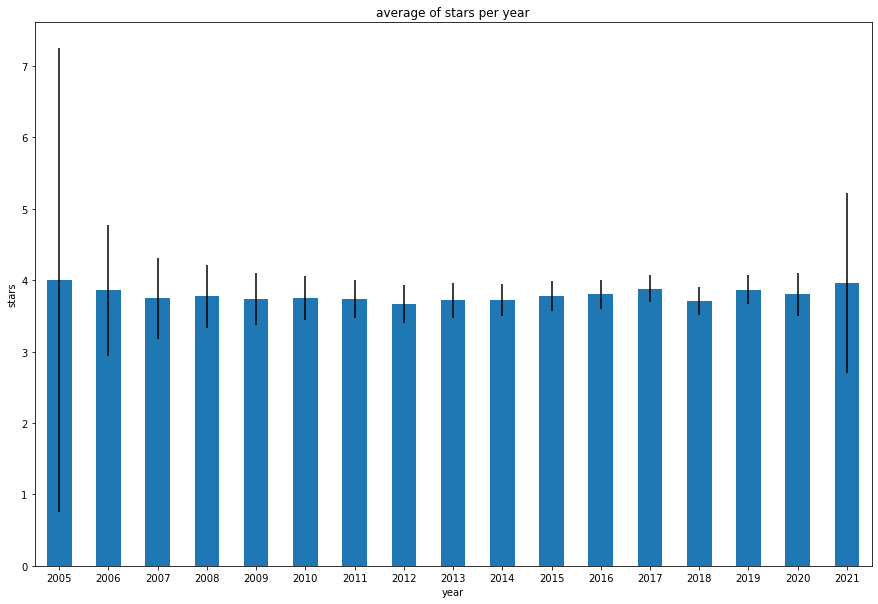

In [147]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(15,10), yerr = lengths)
plt.ylabel('stars')
plt.xlabel('year')
plt.title('average of stars per year')
plt.show()

In [148]:
def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

In [149]:
lengths = []
for i in range(2005, 2022):
    data = df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(i).values
    lengths.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths)

[2.1666666666666665, 0.8107142857142855, 0.5454545454545459, 0.3978494623655915, 0.3582770270270266, 0.3145539906103285, 0.2660550458715596, 0.2685714285714287, 0.24735054347826102, 0.2148764258555138, 0.21759259259259256, 0.2025677603423679, 0.19359145527369837, 0.18549498746867155, 0.20090655509065591, 0.2854797979797983, 1.166666666666667]


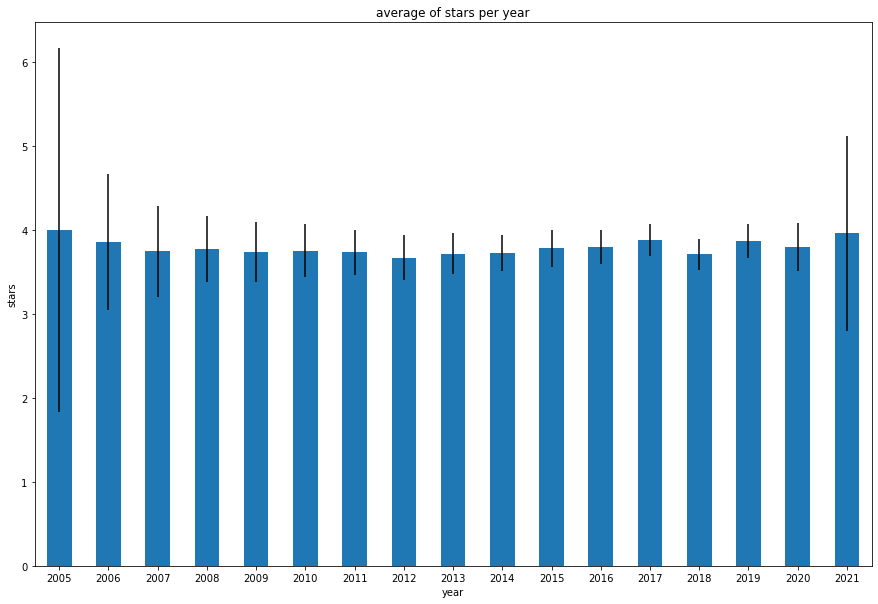

In [150]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(15,10), yerr = lengths)
plt.ylabel('stars')
plt.xlabel('year')
plt.title('average of stars per year')
plt.show()

Since the confidence interval overlaps, the difference is not significative